In [46]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Functions import Basic_info_func, Remove_outliers_with_lof, Select_k_best_features
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Path = /OneDrive/Desktop/MS-AAi/Course_500_Probability/Project_AAI500-A1 

In [30]:
#loading dataset 
df = pd.read_csv('./Data/train.csv')

In [31]:
independent_variables = df.drop('critical_temp', axis = 1)
target_variable = df['critical_temp']
    
train_X, test_X, train_y, test_y = train_test_split(independent_variables, target_variable, 
                                                    test_size=0.2, random_state=0, shuffle=True)


### Outlier Detection and removal

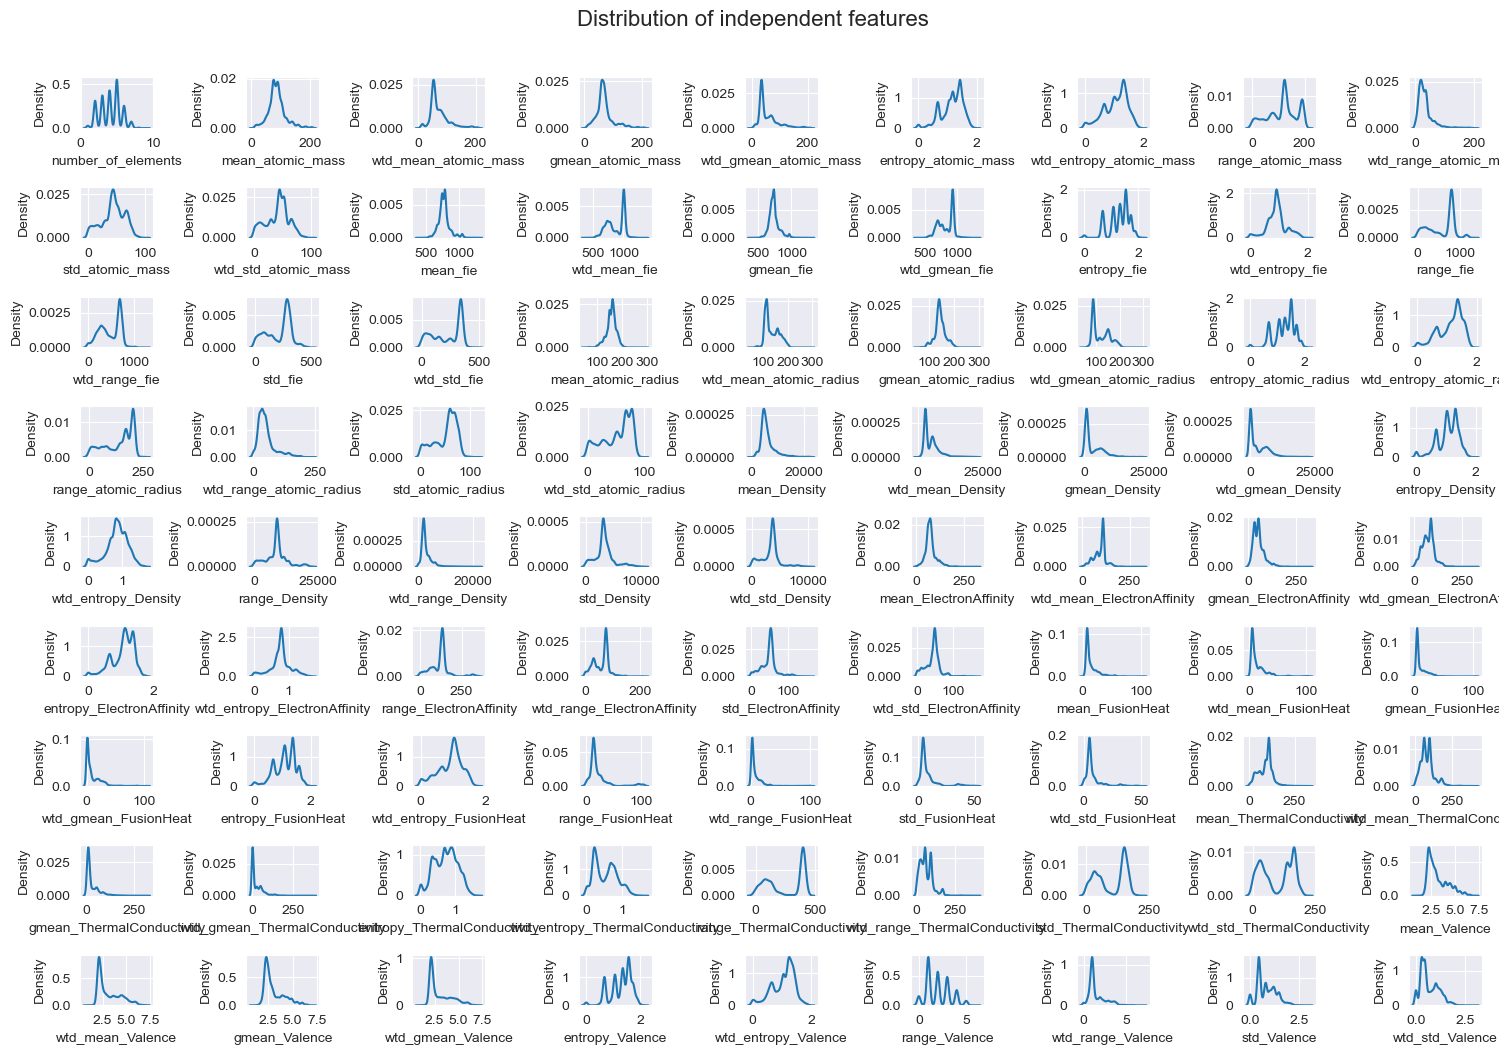

In [38]:
# Determine the number of features and calculate the number of subplots needed
num_features = len(train_X)

# Create the subplots
sns.set_style('darkgrid')
fig, ax = plt.subplots(9, 9, figsize=(15, 10))

# Flatten the axes array for easy iteration
ax_flat = ax.flatten()

# Iterate over each element property and corresponding axis
for property_name, axis in zip(train_X, ax_flat):
    sns.kdeplot(data=df, x=property_name , ax=axis)

# Hide empty subplots if any
for axis in ax_flat[num_features:]:
    axis.axis('off')

plt.tight_layout()
plt.suptitle('Distribution of independent features', fontsize=16, y=1.05)
plt.show()


Notice that we have features that seem to have some extereme values, such as wtd_range_FusionHeat and mean_Density. In order to tackle these extremet points we can use a Machine lerning approch named local outlier factor that can help us predicting outliers and removing them. 

In [33]:
new_train_X, new_train_y  = Remove_outliers_with_lof(train_X, train_y, contamination = 0.05)

Shape before outlier removal:
(17010, 82)

Shape after outlier removal:
(16159, 82)


#### Features Selection

In the data analysis part we observed that our entire data has many highly colinear features that causes multi colinearity. 


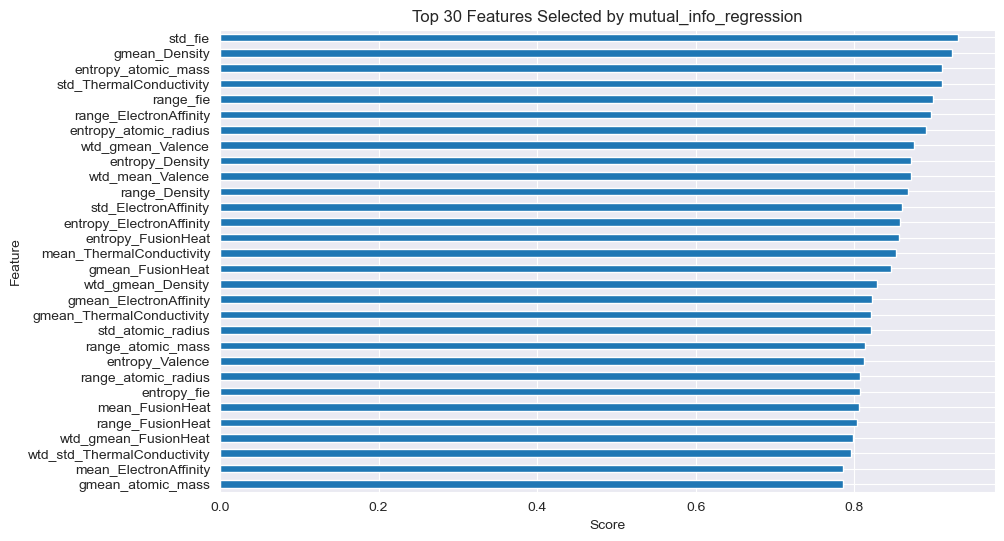

Selected top 30 features:

Scores of all features:


In [43]:
# Assuming train_X and train_y are already defined and contain the training data

k = 30  # Number of features to select
X_new, scores = Select_k_best_features(new_train_X, new_train_y, k=k, score_func=mutual_info_regression)

print(f"Selected top {k} features:")
print("\nScores of all features:")
# print(scores)


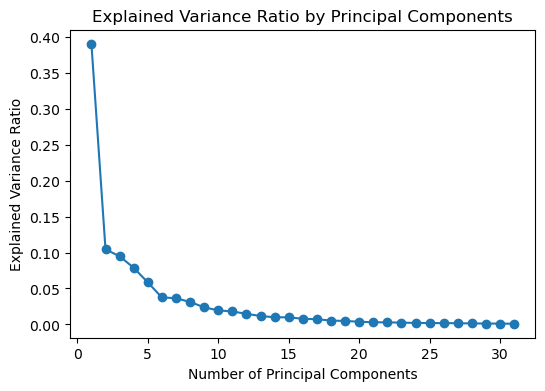


Number of components used: 31


In [35]:
# n_components = 20  # Number of components to retain
desired_variance = 0.99  # Desired cumulative variance to retain

X_pca_df, pca_model, n_components_used = apply_pca(new_train_X, n_components=n_components, desired_variance=desired_variance)

print(f"\nNumber of components used: {n_components_used}")


### Linear Model 

In [44]:
model1 = LinearRegression()

model1.fit(X_new, new_train_y)

train_preds = model1.predict(X_new)

MSE = mean_squared_error(new_train_y, train_preds)

MAE = mean_absolute_error(new_train_y, train_preds)

R2_score = r2_score(new_train_y, train_preds)

print(f'MSE: ', MSE)
print(f'MAE: ', MAE)
print(f'R2_score: ', R2_score)

MSE:  391.8448458099912
MAE:  15.085882495903839
R2_score:  0.6647812970942436


In [ ]:
# Initializing and fitting the Linear Regression model
poly_reg=PolynomialFeatures(degree=4)
X_train_poly=poly_reg.fit_transform(X_new)
lin_reg_poly=LinearRegression()
lin_reg_poly.fit(X_train_poly, new_train_y)

# Making predictions
y_train_pred = lin_reg_poly.predict(X_train_poly)
# X_test_poly = poly_reg.fit_transform(X_test)
# y_test_pred = lin_reg_poly.predict(X_test_poly)

# Evaluating the model
train_rmse = mean_squared_error(new_train_y, y_train_pred, squared=False)
# test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(new_train_y, y_train_pred)
# test_r2 = r2_score(y_test, y_test_pred)

# Printing evaluation metrics
print("Training RMSE:", train_rmse)
# print("Testing RMSE:", test_rmse)
print("Training R^2:", train_r2)
# print("Testing R^2:", test_r2)

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature')
plt.show()
